In [22]:
%matplotlib notebook
from matplotlib.pyplot import *
import numpy

<center><font size=40>An Introduction to:</font size=60>

<img src="images/python_logo.png">

<center><font size=6>[Ben Rusholme](mailto:rusholme@caltech.edu)<br><br>
IPAC<br><br>
2016-04-07<br><br>
https://github.com/rusholme/intro_to_python

## Table of Contents

[Introduction](#Introduction)<br>
[Installation](#Installation)<br>
[Running Python](#Running Python)<br>
[Basic Syntax](#Basic Syntax)<br>
[Namespaces](#Namespaces)<br>
[Compound Statements](#Compound Statements)<br>
[File I/O](#File I/O)<br>
[Plotting](#Plotting)<br>
[Tips, Tricks & Gotchas](#Tips, Tricks & Gotchas)<br>
[To Conclude](#To Conclude)<br>

# <a id='Introduction'></a> <center>Introduction</center>

## Purpose

* 120 min introduction to Python, O(50) people
* You will ***not*** learn Python in this session
* To learn work through tutorials such as:
    - [Software Carpentry](http://swcarpentry.github.io/python-novice-inflammation)
    - [Codecademy](https://www.codecademy.com/learn/python)
    - [Google University](https://developers.google.com/edu/python/?hl=en)
    - [Think Python](http://www.greenteapress.com/thinkpython/thinkpython.html )
    - [Python for Scientific Computing](http://indranilsinharoy.com/2013/01/06/python-for-scientific-computing-a-collection-of-resources/)
* Hopefully this session will smooth your journey
* I will cover a lot of material at high speed
* I am assuming you currently use IDL

## Questions to Answer?

* What software is available?
* How do I get everything I need everywhere I work?
* What are the basics?
* How do I read in my data?
* How do I make plots?
* What are the differences from IDL?
* What are the potential problems?

## About this Presentation

* This presentation is written in the Jupyter (formerly IPython) notebook
* Live slides are using the RISE extension https://github.com/damianavila/RISE

In [23]:
print('Hello World!')

Hello World!


* This is the first time I have used Jupyter slides ...
* This notebook is available https://github.com/rusholme/intro_to_python
* NB: This is not how I regularly work in Python!

## Why Python?

* It’s ***free***! (install everywhere, run processing in parallel)
* Everyone else is using it (libraries, local help…)
* Multiple interpreters for integration with other languages
* Highly extensible, object orientated
* Designed for clean, concise, readable syntax

## Disadvantages

* Managing modules
* Modules can make (unexpectedly) significant changes
* Performance (vs compiled languages)
* Reference CPython interpreter is single threaded (GIL)

## How I Use Python

* I am a physicist with no formal computer science training
* Past projects have used FORTRAN, C, IDL, Bash...
* Picked up Python as went along working on Planck
* Use as a "swiss-army knife" for scripting, data processing, numerical analysis & visulization
* ***Really*** got into Python for parallel batch data processing

# <a id='Installation'></a> <center>Installation</center>

## TL;DR

[Install Continuum Anaconda](http://continuum.io/downloads)

## The Python Ecosystem


<img src="images/python_stack.png" width='80%' align="middle">

## Distributions

* [Anaconda](https://store.continuum.io/cshop/anaconda) - Continuum Analytics (conda, mini-conda...)
* [Canopy](https://store.enthought.com) - Enthought
* [Ureka](http://ssb.stsci.edu/ureka) - STSci & Gemini

Can also install via OS tools:
* OSX - Macports, Homebrew
* Linux - Yum, apt-get … 

## Interpreter: v2 vs v3?

Python v3 ( released December, 2008) is not backward compatible with v2. Three major changes:
* `print` statement became function `print()`
* All `ints` are automatically `long`
* float division (`3/2=1` became `3/2=1.5`, use `3//2=1` for integer/floor)

Python v2 no longer getting new features, only bug/security updates until 2020. 

It has taken (lots of) time for the external packages to catch up. IMHO we are finally at the tipping point for v2 -> v3 migration for new projects. However existing v2 code is still fine!

This notebook works in both v2 & v3

<font color='red'>***I will show you how to install both v2 & v3 together with conda***</font>



## Interpreter: Language Implementations

The reference interpreter is CPython, coded in C. There are other implementations:

* Stackless - concurrency using tasklets and channels
* PyPy - Python in Python
* Jython - Python in Java
* IronPython - Python in C# (.NET)

You should know that these exist, but shouldn’t need them
 
NB: CPython != Cython 

## Standard Library

Contains O(100) modules. For full list see:
https://docs.python.org/2/library/


Most useful:

|Category   |Name|
|-----------|--|
|Datatypes  | collections, copy, datetime, queue|
|Numeric    | math, random|
|Files      | csv, (c)pickle| 
|OS         | glob, os, subprocess, time|
|Language   | ` __future__`, 2to3, itertools, multiprocessing, pdb, (c)profile| 

## PyPI - The Python Package Index
<!---
<img src="images/pypi.png">
--->

<img src="images/pypi.png">

## External: The Big 4

NB: All part of SciPy project

| Name   | Logo    | Description |
|------|---|-------------|
| IPython | <img src="images/ipython_logo.png"> | Enhanced interactive console |
| Matplotlib | <img src="images/matplotlib_logo.png"> | Comprehensive 2D plotting |
| Numpy | <img src="images/numpy_logo.png">  | Base N-dimensional array package |
| Pandas | <img src="images/pandas.jpg">  | Data structures & analysis |


## External: Other Important

|Name |Description|
|--|--|
|astropy      | Astronomy |
|cython       | C extensions |
|healpy       | HEALPix |
|h5py         | HDF5 |
|mpi4py       | Message-passing parallelism |
|nose         | Unit testing |
|pandas       | Data structures and analysis (competitor to R) |
|pep8         | Style checking |
|pip          | Package installation |
|pyfits       | FITs files |
|pyraf        | IRAF |
|scikit-learn | Machine learning |
|scikit-image | Image processing |
|scipy        | Scientific codes |
|sympy        | Symbolic mathematics |
|virtualenv   | Environment virtualization |
|yt           | Simulation visualization |

## Installing Modules

Package manager:
* Conda: `conda install <package>`
* Macports: `port install <package>`

pip:
* `pip install <package>`

By hand:
* `python setup.py install`


Installed to: `<sys.prefix>/lib/python<sys.version_info>/site-packages` 

## Repeatable Installations

* `pip freeze > requirements.txt`
* `pip install -r requirements.txt`

## Virtual Environments

If virtualenv module installed:

Can be run from source if neither installed nor install permissions:

Conda has similiar functionality:

I use conda's virtual environments to switch between Python v2 & v3 on my laptop, see (http://continuum.io/blog/anaconda-python-3)

# <a id='Running Python'></a> <center>Running Python</center>

## Direct Interpreter

## IPython

* Command shell wrapper around the interpreter
* Enhanced REPL
* Can embed in scripts (== IDL STOP)
* Browser-based notebook with inline plots
* Parallel execution of commands and scripts

Notes:
* --pylab option deprecated
* Non-Python parts recently spun off into Jupyter

### REPL

* Command history/searching
* Tab completion
* ?/??/help() for info/help
* ! system escape
* Input/output caching (_#)
* % “magic” methods:

|Command | Description |
|--|--|
|%run (-t, -d, -p) `<script.py>` |Run script   | 
|%timeit                       |Time command     |
|%cpaste                       |Indented cut and paste |
|%who(s)                       |Examine namespace      |

In [24]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

### Notebook

"Web-based interactive computational environment where you can combine code execution, text, mathematics, plots and rich media into a single document" 


Excels for prototyping, data examination, remote work & presentations


Cells can be:
* Code
* Markdown
* Header
* Raw

Press `'h'` for list of keyboard commands

### LaTeX

In [25]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

# <a id='Basic Syntax'></a> <center>Basic Syntax</center>

### Operators - Arithmetic & Assignment

|Operator ||Assignment||
|:--:|--|:--:|--|
|   |   | = | |
|+  |   | += | increment |
|-  |   | -= | decrement |
|`*` |  | `*=` | |
|`/` |  | `/=` | |
|`//` | floor  | `//=` | |
|`%` | modulo | `%=` | |
|`**` | power (**NOT `^`**)  | `**=` | |
| | | a = b = 1 | multiple |
| | | a, b = 1, 2 | |

In [26]:
a = 3
a += 27
print(a)

30


In [27]:
q, m = divmod(10,3)
print(q, m)

3 1


### Operators - Logical

### Operators - Membership

In [28]:
'i' in 'team'

False

### Operators - Identity

In [29]:
2 is 2.0

False

### Operators - Comparison

### Operators - Bitwise/Binary

|Symbol |Operation |
|:--:|--|
|`&` | AND |
|&#124; | OR |
|`^` | XOR |
|`~` | ones complement |
|`<<` | left shift |
|`>>` | right shift |


In [30]:
9 & 8

8

In [31]:
print(bin(9))
print(bin(8))

0b1001
0b1000


### Datatypes - Constants

### Datatypes - Numeric

|Type| Assignment|Note|
|:--:|:--:|--|
|`int` | `a = 1` | |
|`long` | `a = 1L` | Python2 only - all Python3 ints are long
|`float` | `a = 1.` | |
|`complex` | `a = 1j` | j can be either lower or upper case


In [32]:
a = 1j
print(a, type(a)) 

1j <class 'complex'>


### Datatypes - Sequences

#### String
Denoted by either single or double quotes, just match consistently:

In [33]:
print('these', "are", '"some"', "'strings'")

these are "some" 'strings'


#### List

General container, denoted by square brackets `[...]`, can contain ***anything***

In [34]:
a = [1, 3.0, 4+5j, 'six' ]
print(a)
a[0]='blah'
print(a)

[1, 3.0, (4+5j), 'six']
['blah', 3.0, (4+5j), 'six']


#### Tuple

An ***immutable*** list, that is state cannot be changed after creation. Denoted by round brackets `(...)`

#### Sets

There are 2 set types: `set` and `frozenset` (mutable/immutable). Sets are created with curly brackets `{...}` or the function `set()`:

In [35]:
a = {1,2,3}
type(a)

set

The classic set methods (intersection/union) are available:

The common use of sets is to remove duplicates:

In [36]:
a = [1,1,2,9,2,3,4,5,6,7,6,5,3,2,1]
set(a)

{1, 2, 3, 4, 5, 6, 7, 9}

Note there is also a numpy routine to do the same: 

In [37]:
numpy.unique(a)

array([1, 2, 3, 4, 5, 6, 7, 9])

### Datatypes - Dictionaries

A dictionary contains values accessed by keys: 

In [38]:
d = {'key':'value'}

They are used for mapping one quantity to something else:

In [39]:
translate = {'red':'rouge',
             'green':'vert',
             'blue':'bleu',
             'black':'noir',
             'white':'blanc'}
print(translate['red'])

rouge


Note:
* order is not conserved! Use collections.ordereddict if important

In [40]:
print(translate.keys())

dict_keys(['red', 'green', 'blue', 'black', 'white'])


* Mapping is one way only

In [41]:
print(translate['noir'])

KeyError: 'noir'

Example of dict in action:

In [ ]:
hfi = { '100': [ '100-1a','100-1b','100-2a','100-2b',
                 '100-3a','100-3b','100-4a','100-4b'  ],
        '143': [ '143-1a','143-1b','143-2a','143-2b',
                 '143-3a','143-3b','143-4a','143-4b',
                 '143-5' ,'143-6' ,'143-7'            ],
        '217': [ '217-1' ,'217-2' ,'217-3' ,'217-4' ,
                 '217-5a','217-5b','217-6a','217-6b',
                 '217-7a','217-7b','217-8a','217-8b'  ],
        '353': [ '353-1' ,'353-2' ,'353-3a','353-3b',
                 '353-4a','353-4b','353-5a','353-5b',
                 '353-6a','353-6b','353-7' ,'353-8'   ],
        '545': [ '545-1' ,'545-2' ,         '545-4'   ],
        '857': [ '857-1' ,'857-2' ,'857-3' ,'857-4'   ] }

print(         hfi.keys()  )
print( sorted( hfi.keys() ))
print( hfi['857'] )

## Indexing

* First element = 0
* Initialize index list with: `range(start, stop, step)`
* Index with [start: stop: step]
* Negative indices count back from end

In [ ]:
a = range(10)
print(*a)  # Python3 print(*a) to expand range

In [ ]:
a[0]

In [ ]:
print( *a[3:6] )
print( *a[3:] )

In [ ]:
print( a[-1] )
print( a[-2] )

In [ ]:
print( *a[::2]  )
print( *a[1::2] )
print( *a[::-1] )

## Numpy (Arrays)

Python has array module in standard library but just use numpy for numerical work. There are multiple [array creation routines](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html). The most important are:

|Routine| Description |
|--|--|
|`numpy.array()` | Convert existing array |
|`numpy.arange()` | Evenly-spaced values |
|`numpy.zeros()` | Array filled with zeros |
|`numpy.full()` | Array filled with specified value|

Numpy can parse statements inside indexing brackets (fancy indexing):

In [ ]:
import numpy
a = numpy.arange(10)
print( a )
print( a[a > 6] )


Use record arrays for structured data; can be indexed by field name:

In [ ]:
img = numpy.zeros((2,2),
    {'names': ('r','g','b'),
     'formats': (numpy.float32, numpy.float32, numpy.float32)})

print( img['r'] )
print() # Empty line
img

## Functions vs Methods

Function is independent of explicitly passed data:

In [42]:
a='abcde'
len(a) # Function

5

Method is associated with implicitly passed object:

In [43]:
a.upper() # Method

'ABCDE'

<font color='red'>***Tab-completion will show you all methods associated with an object!***</font>

In [44]:
a.

SyntaxError: invalid syntax (<ipython-input-44-a0d310e2b5e6>, line 1)

Methods change with object type!

Everything in Python is an object!

Note methods can:
* accept arguments
* stack

In [45]:
'eleven'.count('e')

3

In [46]:
filename = 'HFI_SkyMap_353-1_2048_R2.00_year-1.fits'
filename.strip('.fits').split('_')

['HFI', 'SkyMap', '353-1', '2048', 'R2.00', 'year-1']

In [47]:
instrument, product, detector, nside, version, period = filename.strip('.fits').split('_')
print( detector, period )

353-1 year-1


# <a id='Namespaces'></a> <center>Namespaces</center>

## Import Statements

Most programs start with import statements of the form:

These set different mapping of names to objects:

In [48]:
%reset -f
%whos

Interactive namespace is empty.


In [49]:
import math
%whos
print()
print( math.pi )

Variable   Type      Data/Info
------------------------------
math       module    <module 'math' from '/Use<...>h.cpython-35m-darwin.so'>

3.141592653589793


In [50]:
%reset -f
import math as m
%whos
print()
print( m.pi )

Variable   Type      Data/Info
------------------------------
m          module    <module 'math' from '/Use<...>h.cpython-35m-darwin.so'>

3.141592653589793


In [51]:
%reset -f
from math import *
%whos
print()
print( pi )

Variable    Type                          Data/Info
---------------------------------------------------
acos        builtin_function_or_method    <built-in function acos>
acosh       builtin_function_or_method    <built-in function acosh>
asin        builtin_function_or_method    <built-in function asin>
asinh       builtin_function_or_method    <built-in function asinh>
atan        builtin_function_or_method    <built-in function atan>
atan2       builtin_function_or_method    <built-in function atan2>
atanh       builtin_function_or_method    <built-in function atanh>
ceil        builtin_function_or_method    <built-in function ceil>
copysign    builtin_function_or_method    <built-in function copysign>
cos         builtin_function_or_method    <built-in function cos>
cosh        builtin_function_or_method    <built-in function cosh>
degrees     builtin_function_or_method    <built-in function degrees>
e           float                         2.718281828459045
erf         builtin_fu

In [52]:
%reset -f
from math import pi, e
%whos
print()
print( pi )

Variable   Type     Data/Info
-----------------------------
e          float    2.718281828459045
pi         float    3.141592653589793

3.141592653589793


Renaming useful for mixing/matching modules but beware of overwriting!

## Reusing Your Own Code

Put common code into a file and import into your namespace (needs to be in same directory or locatable via environment variable PYTHONPATH):

In [53]:
%%bash
cat my_lib.py

hfi = { '100': [ '100-1a','100-1b','100-2a','100-2b',
                 '100-3a','100-3b','100-4a','100-4b'  ],
        '143': [ '143-1a','143-1b','143-2a','143-2b',
                 '143-3a','143-3b','143-4a','143-4b',
                 '143-5' ,'143-6' ,'143-7'            ],
        '217': [ '217-1' ,'217-2' ,'217-3' ,'217-4' ,
                 '217-5a','217-5b','217-6a','217-6b',
                 '217-7a','217-7b','217-8a','217-8b'  ],
        '353': [ '353-1' ,'353-2' ,'353-3a','353-3b',
                 '353-4a','353-4b','353-5a','353-5b',
                 '353-6a','353-6b','353-7' ,'353-8'   ],
        '545': [ '545-1' ,'545-2' ,         '545-4'   ],
        '857': [ '857-1' ,'857-2' ,'857-3' ,'857-4'   ] }




In [54]:
%reset -f
from my_lib import hfi
%whos
hfi

Variable   Type    Data/Info
----------------------------
hfi        dict    n=6


{'100': ['100-1a',
  '100-1b',
  '100-2a',
  '100-2b',
  '100-3a',
  '100-3b',
  '100-4a',
  '100-4b'],
 '143': ['143-1a',
  '143-1b',
  '143-2a',
  '143-2b',
  '143-3a',
  '143-3b',
  '143-4a',
  '143-4b',
  '143-5',
  '143-6',
  '143-7'],
 '217': ['217-1',
  '217-2',
  '217-3',
  '217-4',
  '217-5a',
  '217-5b',
  '217-6a',
  '217-6b',
  '217-7a',
  '217-7b',
  '217-8a',
  '217-8b'],
 '353': ['353-1',
  '353-2',
  '353-3a',
  '353-3b',
  '353-4a',
  '353-4b',
  '353-5a',
  '353-5b',
  '353-6a',
  '353-6b',
  '353-7',
  '353-8'],
 '545': ['545-1', '545-2', '545-4'],
 '857': ['857-1', '857-2', '857-3', '857-4']}

# <a id='Compound Statements'></a> <center>Compound Statements</center>

## Whitespace

* Python does not use brackets or begin/end/do/done to enclose compound statements.
* Blocks are marked by colon '`:`' then relative indentation.
* Either tabs or spaces can be used (but not mixed). PEP8 recommends 4 x space:  

Get comfortable with selecting & manipulating text blocks in your favorite editor (CTRL-V in VIM)! Use `%cpaste` magic to copy/paste into IPython.

## Functions

In [55]:
def do_nothing(input):
    return input
    
do_nothing('a')

'a'

In [106]:
def fizzbuzz(input):
    for n in range(1,input+1):
        print("Fizz"*(n % 3 == 0) + "Buzz"*(n % 5 == 0) or n)
    return

fizzbuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


## Control Flow

* while
* for
* if

but no case/switch. Can be modified by:

* break
* continue
* pass

### While...

In [56]:
count = 0
while count < 9:
   print( 'The count is:', count )
   count += 1

print( "Good bye!" )

The count is: 0
The count is: 1
The count is: 2
The count is: 3
The count is: 4
The count is: 5
The count is: 6
The count is: 7
The count is: 8
Good bye!


### For...

Collection-controlled, similar to IDL `FOREACH`. To count give range.

In [57]:
start = 0
stop = 10
step = 1

for index in range(start, stop, step):
    print( index )

0
1
2
3
4
5
6
7
8
9


In [58]:
for filter in ['u', 'g', 'r', 'i', 'z']:
    print( filter )

u
g
r
i
z


In [59]:
filters = ['u', 'g', 'r', 'i', 'z']
for filter in filters:
    print( filter )

u
g
r
i
z


In [60]:
for index, filter in enumerate(filters):
    print( index, filter )

0 u
1 g
2 r
3 i
4 z


### If...

In [61]:
age = int(input('How old are you? '))

if age <= 2:
    print(' free')
elif 2 < age < 13:
    print(' child fare')
else:
    print(' adult fare')

How old are you? 4
 child fare


# <a id='File I/O'></a> <center>File I/O</center>

## ASCII

Python can natively open/read/write but there are more powerful tools in many modules.

In [103]:
! cat ascii.txt

f = open('ascii.txt','r')
data = f.readlines()
f.close()

print()
print( data )

#id,      ra,              dec
M56,      289.147941100,   30.184500500
ic4710,   277.158208330,   -66.982277780
ngc4552,  188.915863750,   12.556341390

['#id,      ra,              dec\n', 'M56,      289.147941100,   30.184500500\n', 'ic4710,   277.158208330,   -66.982277780\n', 'ngc4552,  188.915863750,   12.556341390\n']


In [63]:
f = open('ascii.txt','a') 
f.write('# Appending comment to file') 
f.close()

! cat ascii.txt

#id,      ra,              dec
M56,      289.147941100,   30.184500500
ic4710,   277.158208330,   -66.982277780
ngc4552,  188.915863750,   12.556341390
# Appending comment to file# Appending comment to file# Appending comment to file# Appending comment to file# Appending comment to file# Appending comment to file# Appending comment to file# Appending comment to file

In [64]:
import numpy
data = numpy.genfromtxt('ascii.txt', delimiter=',', dtype=None, names=True)
data

array([(b'M56', 289.1479411, 30.1845005),
       (b'ic4710', 277.15820833, -66.98227778),
       (b'ngc4552', 188.91586375, 12.55634139)], 
      dtype=[('id', 'S7'), ('ra', '<f8'), ('dec', '<f8')])

In [65]:
data['id']

array([b'M56', b'ic4710', b'ngc4552'], 
      dtype='|S7')

In [66]:
data['id' == 'M56']['ra']

/Users/rusholme/Conda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  if __name__ == '__main__':


289.14794110000003

## FITs

PyFITS has been incorporated into astropy.io.fits, but the API remains the same.

The three most useful commands for reading in data are:
* `pyfits.info(<filename>)`
* `pyfits.getheader(<filename>,<extension>)`
* `pyfits.getdata(<filename>,<extension>)` 

In [67]:
import astropy.io.fits as pyfits 
filename = 'm51a_2mass.fits'
pyfits.info(filename)

Filename: m51a_2mass.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     113   (279, 300)   float32   


In [102]:
hdr = pyfits.getheader(filename,0)
print( hdr['ORIGIN'] )
hdr

2MASS


SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2   / # of Axes                                    
NAXIS1  =                  279                                                  
NAXIS2  =                  300                                                  
BLOCKED =                    T / TAPE MAY BE BLOCKED IN MULTIPLES OF 2880       
EXTEND  =                    T / TAPE MAY HAVE STANDARD FITS EXTENSIONS         
ORDATE  = '980527  '             / Observation Ref Date (yymmdd)                
DAYNUM  = '0453    '             / Observation Day Num                          
FN_PRFX = 'j0453024'             / .rdo and .par filename prefix                
TYPE    = 'sci     '             / Scan type: dar flt sci cal tst               
SCANNO  =                   24   / Scan Number                                  
SCANDIR = 'n       '        

<IPython.core.display.Javascript object>


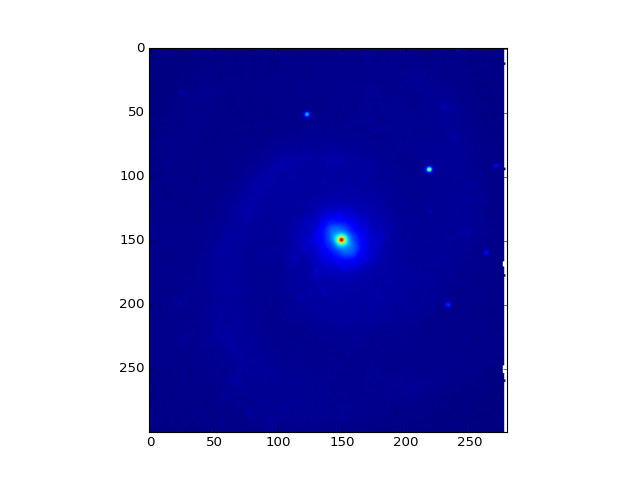

In [100]:
data = pyfits.getdata(filename,0)

%matplotlib notebook
from matplotlib.pyplot import *
imshow(data)

## Temporary files (pickling)

In [71]:
# Python 2: import cPickle as pickle
import pickle

data = range(10)
pickle.dump(data, open('test.pkl', 'wb'))

del data

pickle.load(open('test.pkl', 'rb'))

range(0, 10)

## IDL savefiles

In [72]:
import scipy.io
scipy.io.idl.readsav('idl.sav') 

{'data': array([b'do', b'you', b'really', b'want', b'to', b'do', b'this', b'?'], dtype=object)}

# <a id='Plotting'></a> <center>Plotting</center>

## Initialization 

In [73]:
%matplotlib notebook
from matplotlib.pyplot import *
import numpy

## Simple Lines/Saving

<IPython.core.display.Javascript object>


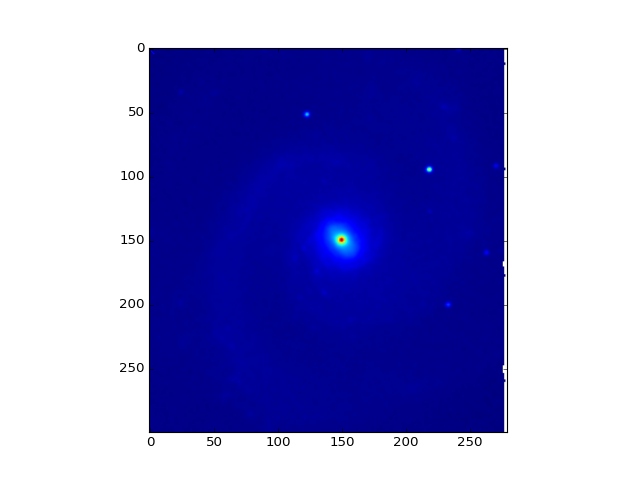

In [90]:
plot([1,2,3,4])
#show() if in command line/ipython
savefig('images/line_plot.png')

Saved image:

<img src='images/line_plot.png'>

## Multiple Lines

<img src="images/matplotlib_table.png" width="600">

In [75]:
# evenly sampled time at 200ms intervals
t = numpy.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g<')


## Subplots

In [76]:
def f(t):
    return numpy.exp(-t) * numpy.cos(2*numpy.pi*t)

t1 = numpy.arange(0.0, 5.0, 0.1)
t2 = numpy.arange(0.0, 5.0, 0.02)

figure(1)
subplot(211)
plot(t1, f(t1), 'bo', t2, f(t2), 'k')

subplot(212)
plot(t2, numpy.cos(2*np.pi*t2), 'r--')

## Histogram/Labels

In [77]:
hist([0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 10])
xlabel('Value')
ylabel('Count')
title('This is a Histogram')

## Gallery

In [78]:
from IPython.display import HTML
HTML('<iframe src=http://matplotlib.org/gallery.html width=100% height=600></iframe>')

# <a id='Tips, Tricks & Gotchas'></a> <center>Tips, Tricks & Gotchas</center>

## Embedding (== IDL STOP)

In [79]:
!cat ipython_stop.py

from IPython import embed
a=1
print 'Entering script'
for b in [1,2,3]:
    embed()
print 'Exiting - goodbye!'


## Copying Variables

In [80]:
a = 1
b = a

print( 'a = %s : %s\nb = %s : %s' %(a, id(a), b, id(b)) )

a = 1 : 4297514912
b = 1 : 4297514912


<img src="images/copy.png" width="400">

In [81]:
b = 2    # Reassign

print( 'a = %s : %s\nb = %s : %s' %(a, id(a), b, id(b)) )

a = 1 : 4297514912
b = 2 : 4297514944


In [82]:
a = [1,2]
b = a

print( 'a = %s : %s\nb = %s : %s' %(a, id(a), b, id(b)) )

a = [1, 2] : 4576604552
b = [1, 2] : 4576604552


In [83]:
b[0] = 3    # Update

print( 'a = %s : %s\nb = %s : %s' %(a, id(a), b, id(b)) )

a = [3, 2] : 4576604552
b = [3, 2] : 4576604552


In [84]:
import copy
b = copy.copy(a)

print( 'a = %s : %s\nb = %s : %s' %(a, id(a), b, id(b)) )

a = [3, 2] : 4576604552
b = [3, 2] : 4576782216


In [85]:
b[0] = 4

print( 'a = %s : %s\nb = %s : %s' %(a, id(a), b, id(b)) )

a = [3, 2] : 4576604552
b = [4, 2] : 4576782216


## List != (Numpy) Array

* Lists can contain anything
* Arrays contain a single type
* Arrays are continuous in memory
* Operations are far more efficient

In [86]:
a = [1,2,3]
b = [4,5,6]

a + b    # Appends

[1, 2, 3, 4, 5, 6]

In [87]:
import numpy as np

c = np.array([7,8,9])
d = np.array([10,11,12])

c + d    # Elementwise

array([17, 19, 21])

In [88]:
a + c    # Elementwise !!!

array([ 8, 10, 12])

In [89]:
[1,2,'three'] + c    # Cannot convert

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

# <a id='To Conclude'></a> <center>To Conclude</center>

* I hope that this has been a useful glimpse into Python
* Both the language itself ...
* ... and the scientific/technical ecosystem around it
* There is (of course) much, much more:
    - handling errors
    - OOP & classes
    - generators
    - ...
* Plus it is still very much evolving!

April 28, 2016, 1:00-3:00 pm<br>
III. Astronomical data reduction and analysis in Python (David Shupe)
- Astropy: vision, history and plans, and how JWST development fits in 
- Accessing astronomical archives within Python 
- Reading and manipulating tables and images
- Exploratory data analysis (visualization and statistics) 
- World Coordinate Systems and coordinate handling
- Photutils for photometry

May 5, 2016, 1:00-3:00 pm<br>
IV. Advanced visualization, model fitting, and data apps (David Shupe)
- Interactive plots: zooming and panning, linking and brushing 
- Visualizing millions of points
- Simple linear regression 
- Introduction to scikit-learn for machine learning 
- Building lightweight specialized data apps